In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA                #principal component analysis
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from matplotlib import animation
from sklearn.preprocessing import RobustScaler
from copy import deepcopy
from sklearn.decomposition import KernelPCA
import seaborn as sns
import sys
from io import StringIO
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle

In [19]:
from sklearn.linear_model import LinearRegression

In [15]:
qso_wise_ukidss = pd.read_csv("qso_wise.csv")

In [16]:
# qso_wise_ukidss = qso_wise_ukidss[qso_wise_ukidss["redshift"]<4]
# qso_wise_ukidss["redshift"].describe()

In [27]:
nan_value = float("NaN")
qso_wise_ukidss.replace("", nan_value, inplace=True)
qso_wise_ukidss.dropna(subset = ["u"], inplace=True)
qso_wise_ukidss.dropna(subset = ["g"], inplace=True)
qso_wise_ukidss.dropna(subset = ["r"], inplace=True)
qso_wise_ukidss.dropna(subset = ["i"], inplace=True)
qso_wise_ukidss.dropna(subset = ["z"], inplace=True)
qso_wise_ukidss.dropna(subset = ["W1mag"], inplace=True)
qso_wise_ukidss.dropna(subset = ["W2mag"], inplace=True)
qso_wise_ukidss.dropna(subset = ["W3mag"], inplace=True)
qso_wise_ukidss.dropna(subset = ["W4mag"], inplace=True)
qso_wise_ukidss.dropna(subset = ["y"], inplace=True)
qso_wise_ukidss.dropna(subset = ["j"], inplace=True)
qso_wise_ukidss.dropna(subset = ["h"], inplace=True)
qso_wise_ukidss.dropna(subset = ["k"], inplace=True)

In [17]:
qso_wise_ukidss["ug"]= qso_wise_ukidss["u"]-qso_wise_ukidss["g"]
qso_wise_ukidss["ur"]= qso_wise_ukidss["u"]-qso_wise_ukidss["r"]
qso_wise_ukidss["ui"]= qso_wise_ukidss["u"]-qso_wise_ukidss["i"]
qso_wise_ukidss["uz"]= qso_wise_ukidss["u"]-qso_wise_ukidss["z"]
qso_wise_ukidss["gr"]= qso_wise_ukidss["g"]-qso_wise_ukidss["r"]
qso_wise_ukidss["gi"]= qso_wise_ukidss["g"]-qso_wise_ukidss["i"]
qso_wise_ukidss["gz"]= qso_wise_ukidss["g"]-qso_wise_ukidss["z"]
qso_wise_ukidss["ri"]= qso_wise_ukidss["r"]-qso_wise_ukidss["i"]
qso_wise_ukidss["rz"]= qso_wise_ukidss["r"]-qso_wise_ukidss["z"]
qso_wise_ukidss["iz"]= qso_wise_ukidss["i"]-qso_wise_ukidss["z"]
qso_wise_ukidss["W1W2"]= qso_wise_ukidss["W1mag"]-qso_wise_ukidss["W2mag"]
qso_wise_ukidss["W1W3"]= qso_wise_ukidss["W1mag"]-qso_wise_ukidss["W3mag"]
qso_wise_ukidss["W1W4"]= qso_wise_ukidss["W1mag"]-qso_wise_ukidss["W4mag"]
qso_wise_ukidss["W2W3"]= qso_wise_ukidss["W2mag"]-qso_wise_ukidss["W3mag"]
qso_wise_ukidss["W2W4"]= qso_wise_ukidss["W2mag"]-qso_wise_ukidss["W4mag"]
qso_wise_ukidss["W3W4"]= qso_wise_ukidss["W3mag"]-qso_wise_ukidss["W4mag"]
# qso_wise_ukidss["YJ"]= qso_wise_ukidss["y"]-qso_wise_ukidss["j"]
# qso_wise_ukidss["YH"]= qso_wise_ukidss["y"]-qso_wise_ukidss["h"]
# qso_wise_ukidss["YK"]= qso_wise_ukidss["y"]-qso_wise_ukidss["k"]
# qso_wise_ukidss["JH"]= qso_wise_ukidss["j"]-qso_wise_ukidss["h"]
# qso_wise_ukidss["JK"]= qso_wise_ukidss["j"]-qso_wise_ukidss["k"]
# qso_wise_ukidss["HK"]= qso_wise_ukidss["h"]-qso_wise_ukidss["k"]
# qso_wise_ukidss["iY"]= qso_wise_ukidss["i"]-qso_wise_ukidss["y"]

In [18]:
X=qso_wise_ukidss[["u","g","r","i","z","ug","ur","ui","uz","gr","gi","gz","ri","rz","iz","W1mag","W2mag","W3mag","W4mag","W1W2","W1W3","W1W4","W2W3","W2W4",
                         "W3W4"]]  # Features from feature importance
y=qso_wise_ukidss['redshift']

# X=qso_wise_ukidss[["z","ug","gr","ri","rz","W1mag","W1W2","W1W3","W2W3","y","YH","YK"]]  # Features from feature importance
# y=qso_wise_ukidss['redshift']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
X.shape

(97016, 36)

In [265]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_train_new = scaler.fit_transform(x_train)
# x_test_new = scaler.fit_transform(x_test)
x_train = (x_train-x_train.mean())/x_train.std()

# X has 36 dimensions/features meaning that a regression model should make a function:
# $y$ = $\beta_0 +\beta_1x_1+\beta_2x_2+...+\beta_{36}x_{36}$
# Now the assumption is that there could be a linear relation between these 36 dimentions and an extra dimension with the redshift


In [48]:
model = LinearRegression()

In [49]:
model.fit(x_train, y_train)

LinearRegression()

In [50]:
r_sq = model.score(x_train, y_train)
>>> print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6240555505625471


In [51]:
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

intercept: -2.0418290463582953
coefficients: [ 9.75461780e+10 -9.15878478e+10  7.08855455e+11 -7.23592933e+11
 -1.70361267e+11 -6.18198939e+11  5.65240224e+11  2.05791627e+12
 -2.10250373e+12 -1.49086789e+11 -7.53632844e+11  3.76108542e+11
 -4.28480023e+11  1.35778003e+11  1.42025592e+12  4.01189481e+11
 -6.17622814e+11  3.98483718e+10  1.76584961e+11 -3.32412961e+11
  1.07705598e+11 -1.76482118e+11 -2.05686994e+11  4.90896847e+11
 -1.37829768e+11 -3.32456002e+11 -6.32534614e+11  7.36485533e+11
  4.07645498e+11 -2.12640854e+11 -3.22146559e+11 -2.25577051e+10
 -4.78516932e+10  1.67666841e+11  2.62536362e+11  1.79140415e+11]


In [52]:
y_pred = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [53]:
from sklearn import metrics

## Errors on the train data

In [54]:
print(metrics.mean_absolute_error(y_train,y_pred))
print(metrics.mean_squared_error(y_train,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_train,y_pred)))

0.36142687346209934
0.30078277135090326
0.6011878853254607


## Errors on the test data

In [55]:
print(metrics.mean_absolute_error(y_test,y_pred_test))
print(metrics.mean_squared_error(y_test,y_pred_test))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred_test)))

0.3600077471255571
0.3049138007331514
0.600006455903232


C:\Users\magei\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


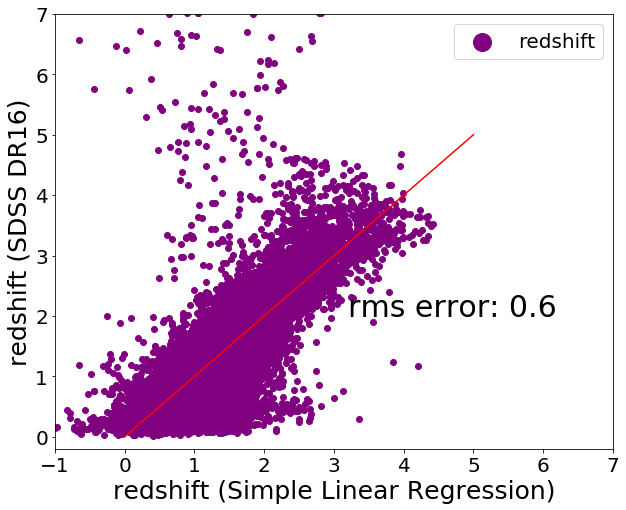

In [80]:
plt.figure(figsize=(10,8))
x=[0,1,2,3,4,5]
y=[]
for i in[0,1,2,3,4,5]:
    yval=x[i]
    y.append(yval)
plt.scatter(y_pred_test,y_test,color="purple")
plt.plot(x,y,color="red")
plt.xlim(-1,7)
plt.ylim(-0.2,7)

ax=plt.axes()
ax.set_xlabel("redshift (Simple Linear Regression)",fontsize=25)
ax.set_ylabel("redshift (SDSS DR16)",fontsize=25)
ax.tick_params(axis="x",colors="k",labelsize=20)
ax.tick_params(axis="y",colors="k",labelsize=20)
plt.annotate("rms error: 0.6", (3.2,2),fontsize=30,color="k")
plt.legend(markerscale=3,fontsize=20);

In [46]:
y_test.describe()

count    19404.000000
mean         1.501166
std          0.891768
min          0.013172
25%          0.794929
50%          1.373863
75%          2.146920
max          7.011245
Name: redshift, dtype: float64

### Polynomial regression

In [389]:
poly_features = poly.fit_transform(X)

poly_features

array([[19.76754 ,  0.4778  ,  1.08069 , ...,  4.157521,  5.462481,
         7.177041],
       [17.10259 ,  0.15013 ,  0.39818 , ...,  1.056784,  1.892548,
         3.389281],
       [17.71166 ,  0.50899 ,  0.76864 , ...,  2.350089,  3.662337,
         5.707321],
       ...,
       [19.97084 ,  4.60411 ,  1.14876 , ...,  1.261129,  2.089903,
         3.463321],
       [20.01364 ,  0.94434 ,  1.04203 , ...,  1.245456,  2.121516,
         3.613801],
       [20.29655 ,  3.08292 ,  1.4005  , ...,  3.7249  ,  4.65516 ,
         5.817744]])

In [400]:
X.values.shape

(96179, 12)

In [435]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features_x = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(poly_features_x, y, test_size = 0.2, random_state = 42)


poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)

LinearRegression()

In [440]:
from sklearn.metrics import mean_squared_error
poly_reg_y_predicted = poly_reg_model.predict(x_test)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

0.39509526293459235

In [442]:
from sklearn.metrics import mean_squared_error
poly_reg_y_predicted = poly_reg_model.predict(x_train)
poly_reg_rmse = np.sqrt(mean_squared_error(y_train, poly_reg_y_predicted))
print("rmse on train data",poly_reg_rmse)

rmse on train data 0.3884072286091091


C:\Users\magei\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


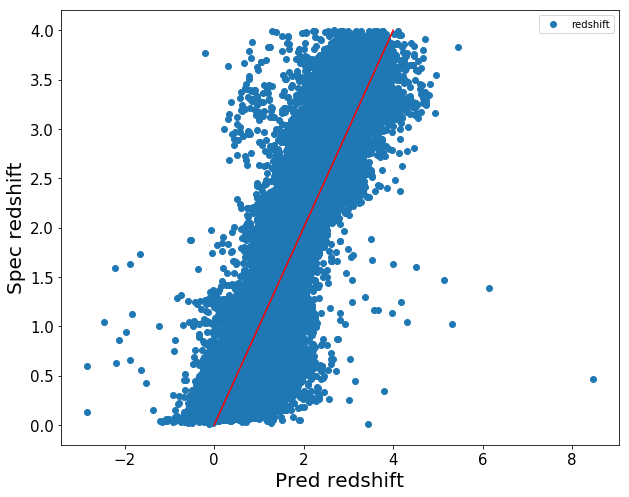

In [443]:
plt.figure(figsize=(10,8))
x=[0,1,2,3,4]
y=[]
for i in[0,1,2,3,4]:
    yval=x[i]
    y.append(yval)
plt.scatter(poly_reg_y_predicted,y_train)
plt.plot(x,y,color="red")
ax=plt.axes()
ax.set_xlabel("Pred redshift",fontsize=20)
ax.set_ylabel("Spec redshift",fontsize=20)
ax.tick_params(axis="x",colors="k",labelsize=15)
ax.tick_params(axis="y",colors="k",labelsize=15)
plt.legend();

In [28]:
import xgboost
from xgboost import XGBRegressor
xgb_r = xgboost.XGBRegressor(objective ='reg:squarederror', min_child_weight=3,
                  max_depth=9, n_estimators = 500, seed = 42,eval_metric="rmsle")

In [29]:
xgb_r.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric='rmsle', gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=9, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [22]:
filename = 'regression_sdss_wise.sav'
pickle.dump(xgb_r, open(filename, 'wb'))

In [23]:
# print(f"intercept: {xgb_r.intercept_}")
# print(f"coefficients: {xgb_r.coef_}")

In [30]:
pred = xgb_r.predict(x_test)
pred_train = xgb_r.predict(x_train)

In [31]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))
rmse_train = np.sqrt(MSE(y_train, pred_train))
print("RMSE on train: % f" %(rmse_train))

RMSE :  0.410170
RMSE on train:  0.189324


C:\Users\magei\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


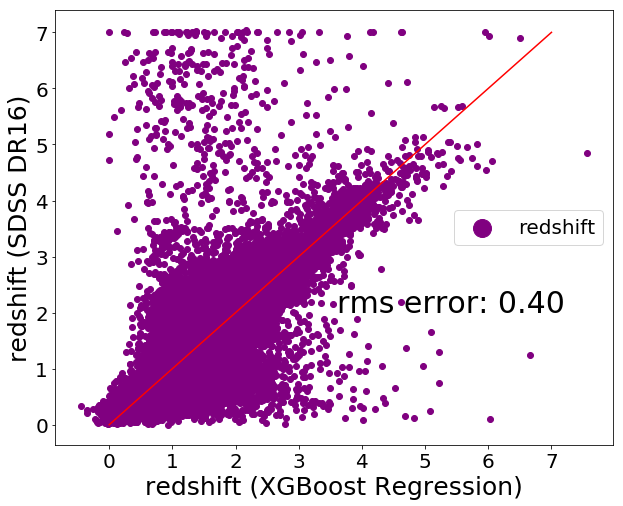

In [27]:
plt.figure(figsize=(10,8))
x=[0,1,2,3,4,5,6,7]
y=[]
for i in[0,1,2,3,4,5,6,7]:
    yval=x[i]
    y.append(yval)
plt.scatter(pred,y_test,color="purple")
plt.plot(x,y,color="red")


ax=plt.axes()
ax.set_xlabel("redshift (XGBoost Regression)",fontsize=25)
ax.set_ylabel("redshift (SDSS DR16)",fontsize=25)
ax.tick_params(axis="x",colors="k",labelsize=20)
ax.tick_params(axis="y",colors="k",labelsize=20)
plt.annotate("rms error: 0.40", (3.6,2),fontsize=30,color="k")

plt.legend(markerscale=3,fontsize=20);

C:\Users\magei\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


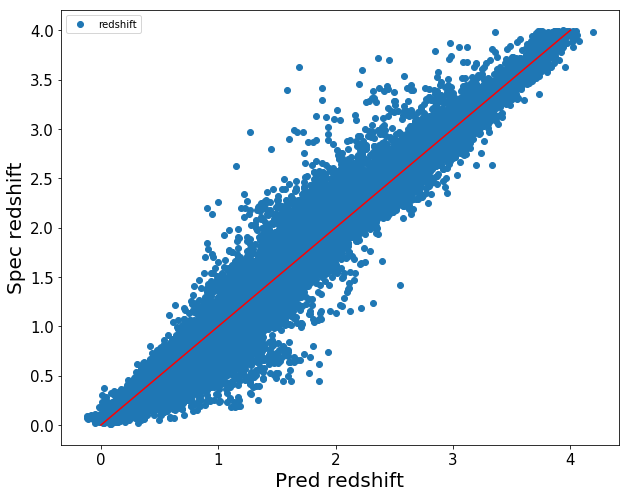

In [16]:
plt.figure(figsize=(10,8))
x=[0,1,2,3,4]
y=[]
for i in[0,1,2,3,4]:
    yval=x[i]
    y.append(yval)
plt.scatter(pred_train,y_train)
plt.plot(x,y,color="red")
ax=plt.axes()
ax.set_xlabel("Pred redshift",fontsize=20)
ax.set_ylabel("Spec redshift",fontsize=20)
ax.tick_params(axis="x",colors="k",labelsize=15)
ax.tick_params(axis="y",colors="k",labelsize=15)
plt.legend();

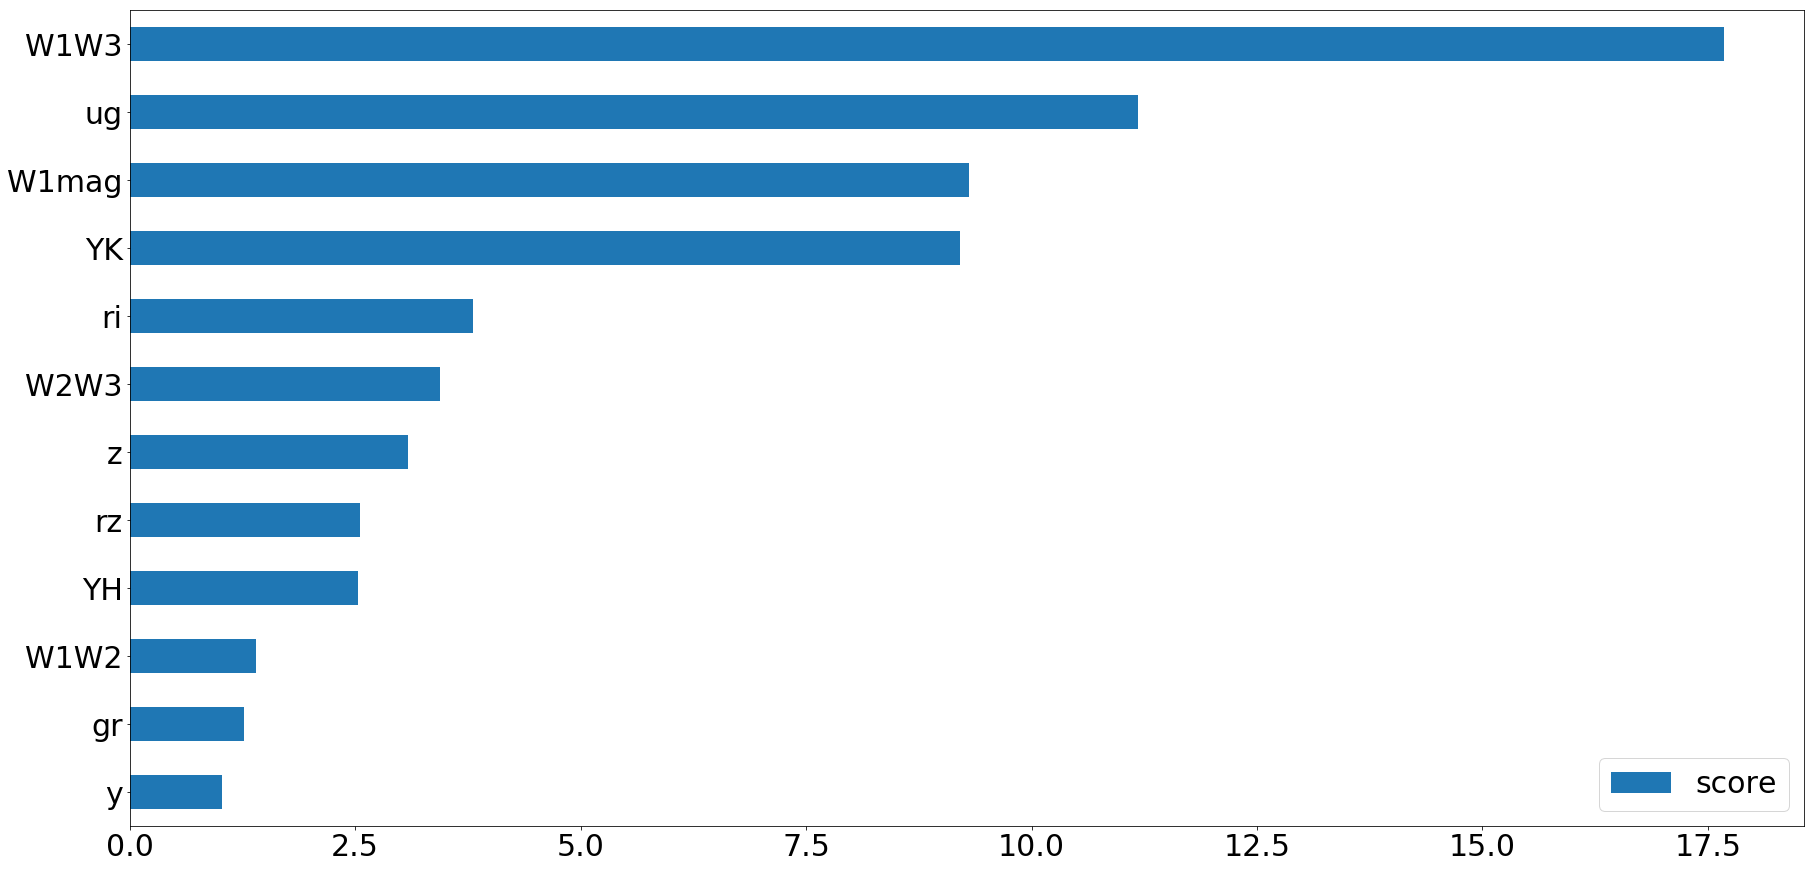

In [351]:
feature_important = xgb_r.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score")
data.nsmallest(40, columns="score").plot(kind='barh', figsize = (30,15)) ## plot top 40 features
ax=plt.axes()

ax.tick_params(axis="x",colors="k",labelsize=30)
ax.tick_params(axis="y",colors="k",labelsize=30)
plt.legend(fontsize=30,markerscale=30)
plt.savefig('fi_gaia.png')